In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


dataset = pd.read_excel('DATA/cdicandnormal.xlsx', header=None)

feature_names = dataset.iloc[0,0:76]
# attributes
X = dataset.iloc[1:80, 0:76]

# label(result)
y = dataset.iloc[1:80, 76]

In [2]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4)
# Scaling to bring values to the same range

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (55, 76) (55,)
Test set: (24, 76) (24,)


In [9]:
########################################### KNN MODEL ############################################################
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.79166667, 0.70833333, 0.70833333, 0.75      , 0.83333333,
       0.79166667, 0.83333333, 0.79166667, 0.875     ])

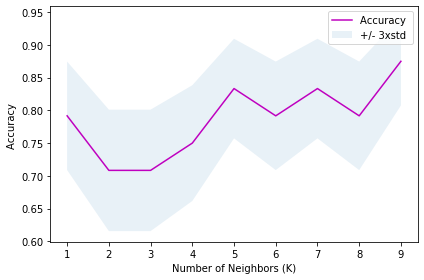

In [10]:
plt.plot(range(1,Ks),mean_acc,'m')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
yhat = neigh.predict(X_test)

In [11]:
################################################## DECISION TRESS ##################################################################################
from sklearn.tree import DecisionTreeClassifier
max_depth = 10
mean_acc = np.zeros((max_depth-1))
std_acc = np.zeros((max_depth-1))
for n in range(1,max_depth):
    dec = DecisionTreeClassifier(criterion='entropy', max_depth=n).fit(X_train,y_train)
    yhat = dec.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    mean_acc

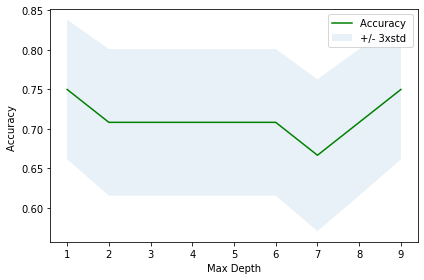

In [12]:
plt.plot(range(1,max_depth),mean_acc,'g')
plt.fill_between(range(1,max_depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max Depth')
plt.tight_layout()
plt.show()

In [13]:
# depth 1 or 2 seems overly simplistic, let's choose depth = 6 as the best model
dec_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=6).fit(X,y)

In [14]:
################################################ SVM ##########################################3

from sklearn import svm
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mean_acc = {}
std_acc = {}

for kernel in kernels:
    neigh = svm.SVC(kernel=kernel).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[kernel] = metrics.accuracy_score(y_test, yhat)
    std_acc[kernel] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

{'linear': 0.9166666666666666,
 'poly': 0.375,
 'rbf': 0.9166666666666666,
 'sigmoid': 0.7083333333333334}

In [15]:
# the linear model seem to give the best result
from sklearn.metrics import accuracy_score
svm_model = svm.SVC(kernel=kernel).fit(X, y)
accuracy = accuracy_score(y_test, yhat.round())
accuracy

C:\Users\Prave\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7083333333333334

In [16]:
######################################################## LOGISTIC REGRESSION ##################################################
from sklearn.linear_model import LogisticRegression
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
regularisations = [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001]
solver_mean_acc = {}
solver_std_acc = {}
solver_best_reg = {}
for solver in solvers:
    best_mean = 0
    best_std = 0
    best_reg = 0
    for reg in regularisations:
        lr = LogisticRegression(C=reg, solver=solver).fit(X_train, y_train)
        yhat = lr.predict(X_test)
        mean = metrics.accuracy_score(y_test, yhat)
        std = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
        if mean > best_mean:
            best_mean = mean
            best_std = std
            best_reg = reg
    solver_mean_acc[solver] = best_mean
    solver_std_acc[solver] = best_std
    solver_best_reg[solver] = best_reg

solver_mean_acc

C:\Users\Prave\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Prave\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Prave\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Prave\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Prave\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

{'newton-cg': 0.875,
 'lbfgs': 0.875,
 'liblinear': 0.875,
 'sag': 0.875,
 'saga': 0.875}

In [17]:
solver_best_reg

{'newton-cg': 1, 'lbfgs': 1, 'liblinear': 1, 'sag': 1, 'saga': 0.3}

In [18]:
lr_model = LogisticRegression(C=0.3, solver='lbfgs').fit(X, y)

C:\Users\Prave\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [5]:
############################################### RANDOM FOREST ##################################################################
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [6]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.0s finished
C:\Users\Prave\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [7]:
rf_random.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [8]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
def evaluate(model, X_test, y_test):
    yhat = model.predict(X_test)
   # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat.round())
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, yhat.round())
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat.round())
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat.round(),'weighted')
    print('F1 score: %f' % f1)
    # Jaccard Index
    jaccard=jaccard_score(y_test, yhat.round(),'weighted')
    print('Jaccard: %f' % jaccard)
    # kappa
    kappa = cohen_kappa_score(y_test, yhat.round())
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test, yhat.round())
    print('ROC AUC: %f' % auc)
    # confusion matrix
    matrix = confusion_matrix(y_test, yhat.round())
    print(matrix)
    
    return accuracy,precision,recall,f1,jaccard,kappa,auc,matrix

In [30]:
################################################# NAIVE BAYES ##############################################
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
yhat = gnb.predict(X_test)


In [20]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [36]:
df = pd.DataFrame(index=['KNN', 'Decision Tree', 'SVM', 'Logistic Regression','Random Forest', 'Naive Bayes'], 
                  columns=['Accuracy','Precision','Recall','Kappa','Jaccard', 'F1-score', 'ROC','Confusion Matrix', 'LogLoss'])

# -------------------------------------------TABLE CREATION--------------------------------------------------------

# -------------------------------------------------KNN----------------------------------------------------------------
yhat = neigh.predict(X_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)

df.loc['KNN'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix, np.nan]

# -------------------------------------------------DECISION TREE----------------------------------------------------
yhat = dec_tree_model.predict(X_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)
df.loc['Decision Tree'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix,np.nan]

# ------------------------------------------------------SVM------------------------------------------------------------
yhat = svm_model.predict(X_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)
df.loc['SVM'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix,np.nan]


# ----------------------------------------------------LOGISTIC REGRESSION ---------------------------------------------------------

yhat = lr_model.predict(X_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)
yhat_prob = lr_model.predict_proba(X_test)
ll = log_loss(y_test, yhat_prob)
df.loc['Logistic Regression'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix,np.nan]

# ----------------------------------------------------- RANDOM FOREST ---------------------------------------------------------
yhat = rf_random.predict(X_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)
df.loc['Random Forest'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix,np.nan]


# ----------------------------------------------------- NAIVE BAYES -----------------------------------------------------------
yhat = gnb.predict(X_test)
 # accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat.round(),'weighted')
print('F1 score: %f' % f1)
# Jaccard Index
jaccard=jaccard_score(y_test, yhat.round(),'weighted')
print('Jaccard: %f' % jaccard)
# kappa
kappa = cohen_kappa_score(y_test, yhat.round())
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat.round())
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat.round())
print(matrix)
df.loc['Naive Bayes'] = [accuracy, precision, recall, kappa, jaccard, f1, auc, matrix,np.nan]


Accuracy: 0.708333
Precision: 0.857143
Recall: 0.705882
F1 score: 0.774194
Jaccard: 0.631579
Cohens kappa: 0.373134
ROC AUC: 0.710084
[[ 5  2]
 [ 5 12]]
Accuracy: 0.625000
Precision: 0.833333
Recall: 0.588235
F1 score: 0.689655
Jaccard: 0.526316
Cohens kappa: 0.250000
ROC AUC: 0.651261
[[ 5  2]
 [ 7 10]]
Accuracy: 0.708333
Precision: 0.727273
Recall: 0.941176
F1 score: 0.820513
Jaccard: 0.695652
Cohens kappa: 0.106383
ROC AUC: 0.542017
[[ 1  6]
 [ 1 16]]
Accuracy: 0.708333
Precision: 0.750000
Recall: 0.882353
F1 score: 0.810811
Jaccard: 0.681818
Cohens kappa: 0.192308
ROC AUC: 0.584034
[[ 2  5]
 [ 2 15]]
Accuracy: 0.833333
Precision: 0.933333
Recall: 0.823529
F1 score: 0.875000
Jaccard: 0.777778
Cohens kappa: 0.627907
ROC AUC: 0.840336
[[ 6  1]
 [ 3 14]]
Accuracy: 0.375000
Precision: 0.666667
Recall: 0.235294
F1 score: 0.347826
Jaccard: 0.210526
Cohens kappa: -0.034483
ROC AUC: 0.474790
[[ 5  2]
 [13  4]]


In [37]:
df

,Accuracy,Precision,Recall,Kappa,Jaccard,F1-score,ROC,Confusion Matrix,LogLoss
KNN,0.708333,0.857143,0.705882,0.373134,0.631579,0.774194,0.710084,"[[5, 2], [5, 12]]",NaN
Decision Tree,0.625,0.833333,0.588235,0.25,0.526316,0.689655,0.651261,"[[5, 2], [7, 10]]",NaN
SVM,0.708333,0.727273,0.941176,0.106383,0.695652,0.820513,0.542017,"[[1, 6], [1, 16]]",NaN
Logistic Regression,0.708333,0.75,0.882353,0.192308,0.681818,0.810811,0.584034,"[[2, 5], [2, 15]]",NaN
Random Forest,0.833333,0.933333,0.823529,0.627907,0.777778,0.875,0.840336,"[[6, 1], [3, 14]]",NaN
Naive Bayes,0.375,0.666667,0.235294,-0.0344828,0.210526,0.347826,0.47479,"[[5, 2], [13, 4]]",NaN
